In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


muscle_df = pd.read_excel('Muscle_Data.xlsx')

In [7]:
# Plot measured velocity vs load values
fig = px.line(muscle_df, 'Weight (g)', 'Velocity (mm/ms)', width=1200, height=800)
fig.update_layout(
    title = {
        'text': 'Velocity as a Function of Applied Load',
        'x': 0.5,
        'font_size': 40
    }
)
fig.update_xaxes(title_font=dict(size=30), tickfont=dict(size=20))
fig.update_yaxes(title_font=dict(size=30), tickfont=dict(size=20))
fig.show()

In [3]:
def hill(load_applied):
    a = 2.1  # grams
    b = 0.18  # mm/ms
    P_0 = 2  # grams
    return b*(P_0 - load_applied)/(load_applied + a)

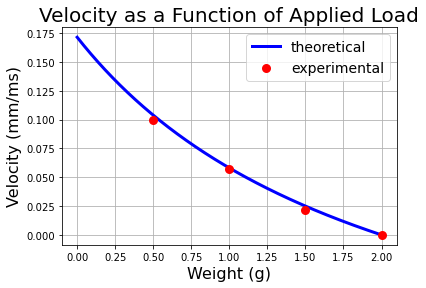

In [4]:
P_0 = 2  # grams

# Find theoretical velocities
Ps = np.linspace(0, P_0, 10000)
hill_velocities = [hill(x) for x in Ps]

# Plot
plt.scatter(muscle_df['Weight (g)'], muscle_df['Velocity (mm/ms)'], zorder=3, color='r', lw=3, label='experimental')
plt.plot(Ps, hill_velocities, color='b', lw=3, label='theoretical')
plt.grid()
plt.xlabel('Weight (g)', fontsize=16)
plt.ylabel('Velocity (mm/ms)', fontsize=16)
plt.title('Velocity as a Function of Applied Load', fontsize=20)
plt.legend(fontsize=14)
plt.show()
# passive force = gradual increase over time, active is reation to being stimulated

In [5]:
def v_div_v_max(load_applied):
    a = 2.1  # grams
    P_0 = 2  # grams
    return a*(1 - load_applied/P_0)/(load_applied + a)

0.07150944618079814


Text(0.5, 1.0, 'Velocity as a Function of Applied Load')

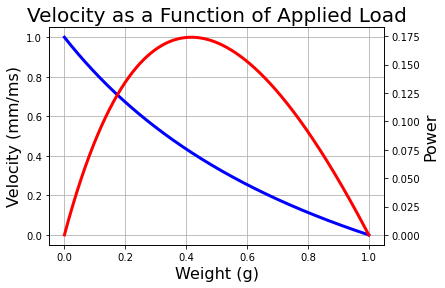

In [8]:
# y = v/v_max; x = P / P_0
Vs = [v_div_v_max(x) for x in Ps]
fig = px.line(x=Ps/2, y=Vs, labels={'x': 'P/P_0', 'y': 'v/v_max'}, width=1200, height=800)
fig.update_layout(
    title = {
        'text': 'V/Vmax as a Function of P/P0',
        'x': 0.5,
        'font_size': 40
    }
)
fig.update_xaxes(title_font=dict(size=30), tickfont=dict(size=20))
fig.update_yaxes(title_font=dict(size=30), tickfont=dict(size=20))
fig.show()

# Compute power from velocity and load
powers = Vs*Ps/2

# Find max power and velocity at it
max_power_idx = np.argmax(powers)
max_power_v = Vs[max_power_idx]
fig.show()

# Shortening velocity that produces maximum power
print(max_power_v*max(hill_velocities))

# Plot on separate y-axes (same fig)
px.line(x=Ps/2, y=powers)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Ps/2, Vs, label='v/v_max', color='b', lw=3)
ax2.plot(Ps/2, powers, label='power', color='r', lw=3)
ax1.grid()
ax1.set_xlabel('Weight (g)', fontsize=16)
ax1.set_ylabel('Velocity (mm/ms)', fontsize=16)
ax2.set_ylabel('Power', fontsize=16)
plt.title('Velocity as a Function of Applied Load', fontsize=20)